In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
import os
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from scipy.io import loadmat
import warnings
warnings.filterwarnings("ignore")

In [52]:
data_dir = "./data/out"
cc_info_dir = './data/out/coclustinfo'
datasets_dir = './data'

In [3]:
def chargement(data_dir, dataset, initial_type=["CA", "zero"], missing_type=["mar"], probas=[0.1,0.2,0.5,0.7]):
    return [[load(f"./{data_dir}/{dataset}-{miss}-{proba}-{ini}.joblib") for proba in probas] for ini in initial_type for miss in missing_type]

In [21]:
def rmse(predictions, targets, ):
    idx=...#targets!=0
    return np.sqrt(((predictions[idx] - targets[idx]) ** 2).mean())

In [42]:
def read_labels(dataset):
    if dataset == "cstr":
        data=loadmat(f"{datasets_dir}/cstr.mat")
        labels=data["gnd"]
#         X_missing=data["fea"]
    elif dataset == "webace":
        data=loadmat(f"{datasets_dir}/WebACE.mat")
        labels=data["gnd"]
#         X_missing=data["fea"]        
    elif dataset == "reviews":
        data=loadmat(f"{datasets_dir}/reviews.mat")
        labels=data["classid"]
#         X_missing=data["dtm"]        
    elif dataset == "classic3":
        data=loadmat(f"{datasets_dir}/classic3.mat")
        labels=data["labels"]
#         X_missing=data["A"]       
    elif dataset == "classic4":
        data=loadmat(f"{datasets_dir}/classic4.mat")
        labels=data["labels"]
#         X_missing=data["mat"]
    return labels.ravel()

In [62]:
def compte_rendu(data_dir, dataset, prefix='',
                 initial_type=["CA", "zero"], 
                 missing_type=["mar", "mcar"], probas=[0.1,0.2,0.5,0.7]):
    real_partition = read_labels(dataset)
    model_seria=chargement(data_dir, dataset, initial_type=initial_type, missing_type=missing_type, probas=probas)
    hyper_param=[f"{ini}_{miss}"for ini in initial_type for miss in missing_type]
    models_rmse=pd.DataFrame({f"{dataset}_{nom}_RMSE":[rmse(np.array(model['imputed']).ravel(), model["real"]) for model in models] for nom, models in zip(hyper_param, model_seria)}, index=probas)    
#     models_rmse.plot()
#     plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    models_nmi=pd.DataFrame({f"{dataset}_{nom}_NMI":[NMI(model["z"], real_partition) for model in models] for nom, models in zip(hyper_param, model_seria)}, index=probas)    
#     models_nmi.plot()
#     plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    models_rmse = models_rmse.rename(columns=lambda x: f"{prefix}{x}")
    models_nmi = models_nmi.rename(columns=lambda x: f"{prefix}{x}")
    return models_rmse, models_nmi

def plot_cr(models_rmse, models_nmi):
    models_rmse.plot()
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    models_nmi.plot()
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

In [61]:
obj = load(f"{cc_info_dir}/cstr-mar-0.1-zero.joblib")
[*obj]
obj['real'].shape
np.array(obj['imputed']).ravel().shape

['imputed', 'real', 'r_nan', 'c_nan', 'z', 'w']

(47500,)

(47500,)

In [66]:
def read_helper(data_dir, cc_info_dir, filename):
    models_rmse, models_nmi =compte_rendu(data_dir, filename, prefix='mod-', initial_type=["CA", "zero", "CoClustMod"])
    models_rmse2 , models_nmi2 =compte_rendu(cc_info_dir, filename, prefix='info-', initial_type=["CA", "zero", "NORMALCA"])
    models_rmse = pd.concat([models_rmse, models_rmse2], axis=1)
    models_nmi = pd.concat([models_nmi, models_nmi2], axis=1)
    return models_rmse, models_nmi

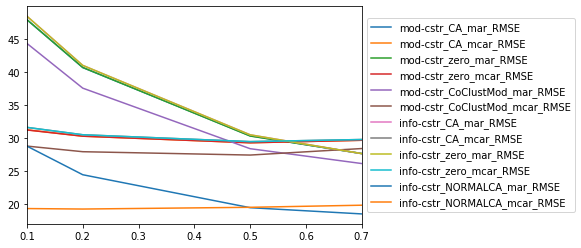

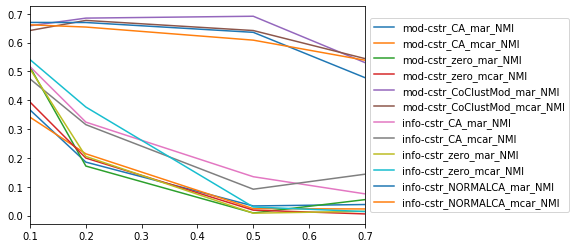

In [67]:
filename="cstr"
cstrRMSE, cstrNMI=read_helper(data_dir, cc_info_dir, filename)
plot_cr(cstrRMSE, cstrNMI)

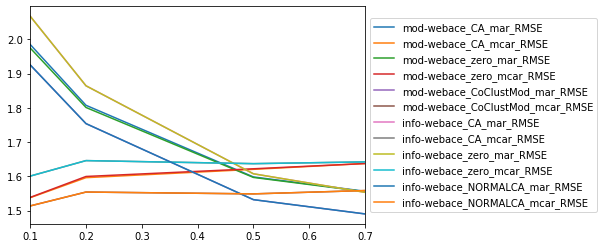

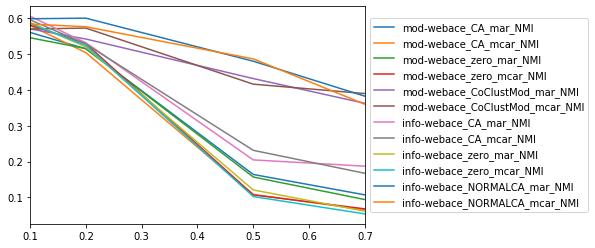

In [69]:
filename="webace"
webaceRMSE, webaceNMI=read_helper(data_dir, cc_info_dir, filename)
plot_cr(webaceRMSE, webaceNMI)

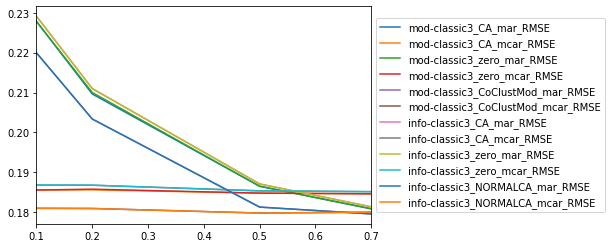

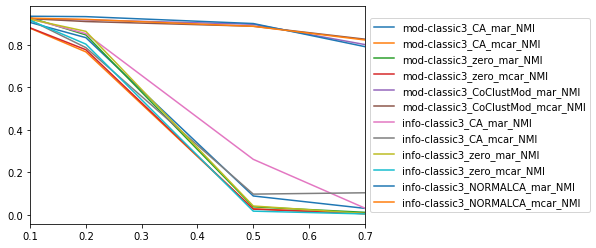

In [71]:
filename="classic3"
classic3RMSE, classic3NMI=read_helper(data_dir, cc_info_dir, filename)
plot_cr(classic3RMSE, classic3NMI)

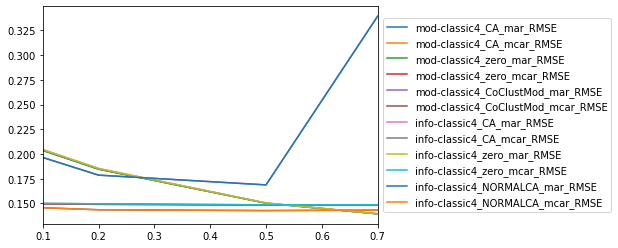

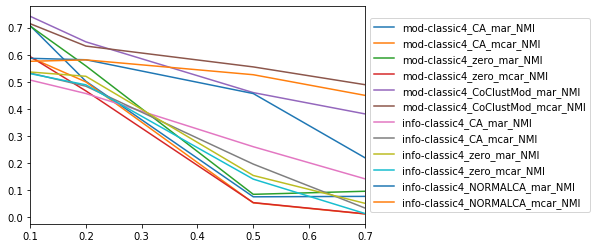

In [79]:
filename = "classic4"
classic4RMSE, classic4NMI = read_helper(data_dir, cc_info_dir, filename)
plot_cr(classic4RMSE, classic4NMI)

In [74]:
cstrNMI

,mod-cstr_CA_mar_NMI,mod-cstr_CA_mcar_NMI,mod-cstr_zero_mar_NMI,mod-cstr_zero_mcar_NMI,mod-cstr_CoClustMod_mar_NMI,mod-cstr_CoClustMod_mcar_NMI,info-cstr_CA_mar_NMI,info-cstr_CA_mcar_NMI,info-cstr_zero_mar_NMI,info-cstr_zero_mcar_NMI,info-cstr_NORMALCA_mar_NMI,info-cstr_NORMALCA_mcar_NMI
0.1,0.365981,0.340862,0.514387,0.393251,0.658064,0.641720,0.515953,0.473557,0.507926,0.540512,0.669631,0.661383
0.2,0.185263,0.214108,0.171594,0.199370,0.684591,0.676600,0.323981,0.315143,0.204872,0.376201,0.669371,0.653608
0.5,0.033307,0.023889,0.008929,0.018740,0.691074,0.641518,0.134669,0.091356,0.008238,0.029702,0.635271,0.608187
0.7,0.038278,0.022940,0.055172,0.005696,0.530494,0.544339,0.075284,0.143347,0.014758,0.013928,0.478262,0.538696


In [75]:
webaceNMI

,mod-webace_CA_mar_NMI,mod-webace_CA_mcar_NMI,mod-webace_zero_mar_NMI,mod-webace_zero_mcar_NMI,mod-webace_CoClustMod_mar_NMI,mod-webace_CoClustMod_mcar_NMI,info-webace_CA_mar_NMI,info-webace_CA_mcar_NMI,info-webace_zero_mar_NMI,info-webace_zero_mcar_NMI,info-webace_NORMALCA_mar_NMI,info-webace_NORMALCA_mcar_NMI
0.1,0.560557,0.580087,0.545658,0.581257,0.570293,0.570123,0.605730,0.595668,0.588402,0.585295,0.598676,0.583842
0.2,0.514719,0.504128,0.515548,0.529032,0.542133,0.572666,0.531766,0.528308,0.519948,0.524191,0.600391,0.576384
0.5,0.163917,0.108145,0.156796,0.106896,0.431717,0.416085,0.204610,0.231334,0.120724,0.102280,0.480119,0.486699
0.7,0.106953,0.065135,0.093833,0.067884,0.362577,0.389846,0.187070,0.167177,0.061246,0.053769,0.382520,0.359972


In [76]:
classic3NMI

,mod-classic3_CA_mar_NMI,mod-classic3_CA_mcar_NMI,mod-classic3_zero_mar_NMI,mod-classic3_zero_mcar_NMI,mod-classic3_CoClustMod_mar_NMI,mod-classic3_CoClustMod_mcar_NMI,info-classic3_CA_mar_NMI,info-classic3_CA_mcar_NMI,info-classic3_zero_mar_NMI,info-classic3_zero_mcar_NMI,info-classic3_NORMALCA_mar_NMI,info-classic3_NORMALCA_mcar_NMI
0.1,0.906066,0.879022,0.928548,0.880707,0.924837,0.924015,0.923306,0.917345,0.921391,0.916074,0.935336,0.926339
0.2,0.834453,0.767398,0.847516,0.777587,0.918331,0.910363,0.853672,0.787468,0.864122,0.803952,0.933480,0.920520
0.5,0.088434,0.027879,0.037289,0.026535,0.897551,0.888337,0.261086,0.097224,0.041275,0.016914,0.900989,0.887847
0.7,0.030164,0.005128,0.011415,0.005198,0.801963,0.827329,0.031274,0.103514,0.005774,0.003930,0.792119,0.823503


In [80]:
classic4NMI

,mod-classic4_CA_mar_NMI,mod-classic4_CA_mcar_NMI,mod-classic4_zero_mar_NMI,mod-classic4_zero_mcar_NMI,mod-classic4_CoClustMod_mar_NMI,mod-classic4_CoClustMod_mcar_NMI,info-classic4_CA_mar_NMI,info-classic4_CA_mcar_NMI,info-classic4_zero_mar_NMI,info-classic4_zero_mcar_NMI,info-classic4_NORMALCA_mar_NMI,info-classic4_NORMALCA_mcar_NMI
0.1,0.707394,0.590015,0.705905,0.593155,0.742064,0.714594,0.506369,0.532288,0.536045,0.530108,0.586622,0.575638
0.2,0.501872,0.499513,0.558595,0.466296,0.647458,0.631878,0.456574,0.483573,0.520218,0.488666,0.581316,0.580821
0.5,0.074970,0.052679,0.084167,0.053473,0.459922,0.554875,0.260053,0.195808,0.153751,0.140266,0.456470,0.526014
0.7,0.076555,0.011765,0.095460,0.012158,0.381329,0.489317,0.141509,0.033644,0.051045,0.013344,0.219417,0.449856


## Conclusion
Contrairement à nos attentes, les méthodes qui ont combiné l'AFC et le coclustering de manière séquentielle ont eu de meilleurs résultats. Pour des taux de valeurs manquantes bas, toutes les méthodes ont des NMI de valeurs comparables. La détérioration du score NMI est moins visible pour la méthode séquentielle quand le taux de valeurs manquantes augmente.  
Cette remarque est due au fait que la méthode que nous avons implémentée est plus complexe, moins stable et requiert un plus grand nombre d'itérations pour converger.  
Nous pensons donc qu'il faut exécuter nos nouvelles méthodes plus longtemps pour avoir une évaluation plus correcte.